## Objective
Our goal was to "analyse and forecast the energy usage in an urban city".

## Data
The source of the data is the following link: [LINK](https://data.world/houston/houston-electricity-bills)

There are 4 files, they are:
1. July 2011 to June 2012 excel file - 57,430 rows and 24 columns
2. May 2012 to April 2013 excel file - 65,806 rows and 24 columns
3. July 2012 to June 2013 excel file - 66,776 rows and 24 columns
4. July 2013 to June 2014 excel file - 67,838 rows and 24 columns

The data tables contain information regarding the building address, location, service number, billing dates, total amount due. 

The plan is to go through and clean the data tables individually and make them consistent. Once that is done the next step is to merge the cleaned data tables. After merging the tables one important check is to search for duplicates since there is an overlap of dates it is highly likely that there will be duplicates.

Description of each column 
1. Reliant Contract No: A unique identifier for each contract. 
2. Service Address: Address for the service location
3. Meter No: Meter number for the service location.
4. ESID: Electric Service Identifier for the service location.
5. Business Area: Business area code for the service location.
6. Cost Center: Cost center code for the service location.
7. Fund: Fund code for the service location.
8. Bill Type: Type of bill (e.g. "T" for "Total", "P" for "Partial", etc.). 
9. Bill Date: Date the bill was generated. 
10. Read Date: Date the meter was read. 
11. Due Date: Due date for the bill. 
12. Meter Read: Meter reading for the service location. 
13. Base Cost: TBase cost for the service. 
14. T&D Discretionary: Transmission and Distribution Discretionary charge for the service. 
15. T&D Charges: Transmission and Distribution charge for the service. 
16. Current Due: Current due amount for the service.
17. Index Charge: Index charge for the service. 
18. Total Due: Total due amount for the service. 
19. Franchise Fee: Franchise fee for the service. 
20. Voucher Date: Date the voucher was issued for the service. 
21. Billed Demand: Billed demand for the service in KVA. 
22. kWh Usage: Kilowatt-hour usage for the service. 
23. Nodal Cu Charge:  Nodal Cu Charge for the service. 
24. Adder Charge:  Adder Charge for the service.

Statistical Data Type of Each Column 
1. Reliant Contract No: integer (ratio)
2. Service Address: string (nominal)
3. Meter No: integer (nominal)
4. ESID: integer (nominal)
5. Business Area: integer (ratio))
6. Cost Center: integer (ratio)
7. Fund: integer (ratio)
8. Bill Type: string (nominal)
9. Bill Date: date (nominal)
10. Read Date: date (nominal)
11. Due Date: date (nominal)
12. Meter Read: integer (ratio)
13. Base Cost: float (nominal)
14. T&D Discretionary: float (nominal)
15. T&D Charges: float (nominal)
16. Current Due: float (nominal)
17. Index Charge: float (nominal)
18. Total Due: float (nominal)
19. Franchise Fee: float (nominal)
20. Voucher Date: date (nominal)
21. Billed Demand (KVA): integer (nominal)
22. kWh Usage: integer (nominal)
23. Nodal Cu Charge: float (nominal)
24. Adder Charge: float (nominal)

## Problem
The key issue in generating electricity is to determine how much capacity to generate in order to meet future demand. 

Electricity usage forecasting involves predicting the demand for electricity over a specific eriod. This process has several uses, including energy procurement, where it helps suppliers purchase the right amount of energy to ensure a steady supply.

The advancement of smart infrastructure and integration of distributed renewable power has raised future supply, demand, and pricing uncertainties. This unpredictability has increased interest in price prediction and energy analysis.

## Research Question
I worked on the following research question: \
Previous electricity usage data can be used for predicting the usage for future (Time-Series)

## Import Statements

In [ ]:
# !pip install xlrd

You are using pip version 18.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score

pd.options.display.max_columns=25

## Mount colab file to drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Insert, change the directory 
import sys
sys.path.insert(0,'/content/drive/MyDrive/CS418-Project-main')
%cd /content/drive/MyDrive/CS418-Project-main

/content/drive/MyDrive/CS418-Project-main


## Data FY 2012 - Hyndavi

In [4]:
data_2012 = pd.read_excel('houston-houston-electricity-bills/coh-fy2012-ee-bills-july2011-june2012.xls')
orig_shape_2012 = data_2012.shape[0]

data_2012.shape

(57430, 24)

In [ ]:
data_2012.head(5)

,Reliant Contract No,Service Address,Meter No,ESID,Business Area,Cost Center,Fund,Bill Type,Bill Date,Read Date,Due Date,Meter Read,Base Cost ($),T&D Discretionary ($),T&D Charges ($),Current Due ($),Adjustment ($),Total Due ($),Franchise Fee ($),Voucher Date,Billed Demand,kWh Usage,Nodal Cu Charge ($),Reliability Unit Charge ($)
0,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2012-06-26,2012-06-21,2012-07-26,47940.0,61070.65,1638.01,10440.86,73232.11,NaN,73232.11,-1047.28,2012-06-27,1507.291667,905421,82.59,0.0
1,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2012-05-25,2012-05-21,2012-06-24,47186.0,56319.47,1631.00,10364.63,68463.46,NaN,68463.46,-1045.21,2012-05-30,1496.907217,824107,148.36,0.0
2,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2012-04-27,2012-04-23,2012-05-27,46499.0,68461.63,1674.67,10676.79,80847.87,NaN,80847.87,-1081.11,2012-04-30,1562.500000,977744,34.78,0.0
3,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2012-03-27,2012-03-21,2012-04-26,45684.0,62036.29,1696.66,10681.48,74373.93,NaN,74373.93,-1087.32,2012-03-28,1567.708333,876838,-40.50,0.0
4,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2012-02-27,2012-02-21,2012-03-28,44954.0,61670.24,1703.80,10707.94,74080.27,NaN,74080.27,-1090.08,2012-02-28,1577.083333,872898,-1.71,0.0


### Checking Nulls

In [ ]:
data_2012.isna().sum()

Reliant Contract No                0
Service Address                    0
Meter No                        7809
ESID                               0
Business Area                      0
Cost Center                        0
Fund                               0
Bill Type                          0
Bill Date                          0
Read Date                          0
Due Date                           0
Meter Read                         2
Base Cost ($)                      0
T&D Discretionary ($)              0
T&D Charges ($)                    0
Current Due ($)                    0
Adjustment ($)                 56259
Total Due ($)                      0
Franchise Fee ($)                  0
Voucher Date                       0
Billed Demand                      3
kWh Usage                          0
Nodal Cu Charge ($)                1
Reliability Unit Charge ($)        4
dtype: int64

### Checking Adjustment ($) column

In [ ]:
data_2012['Adjustment ($)'].value_counts(dropna=False)

NaN       56259
0.0        1170
9425.9        1
Name: Adjustment ($), dtype: int64

The column does not have any relevant information based on the above reported values. Electing to drop the column.

In [ ]:
data_2012.drop(columns=['Adjustment ($)'], inplace=True)

### Checking Unique Number of Customers

There are quite a few columns in the dataset that signify relating to a unique person/house/business. Checking the unique counts of such columns.

In [ ]:
check_unique_columns = ['Reliant Contract No', 'Service Address ', 'Meter No', 
                        'ESID', 'Business Area', 'Cost Center',]

for col in check_unique_columns:
    print(f'Number of Unique Values in {col}: {data_2012[col].nunique()}')

Number of Unique Values in Reliant Contract No: 5241
Number of Unique Values in Service Address : 5183
Number of Unique Values in Meter No: 4021
Number of Unique Values in ESID: 5241
Number of Unique Values in Business Area: 9
Number of Unique Values in Cost Center: 38


Based on the above reported values and further research online:

ESID signifies a unique ID provided to each customer subscribed to the electricity board. It would be best to choose ESID and Service Address columns going forward as these would provide number of unique customers and the areas (streets) where higher usage of electricity occurs.

Business Area signifies a grouping a number of buildings which covers a certain area. This would be useful usage patterns grouped by certain zones in the city.

### Checking Bill Type

In [ ]:
data_2012['Bill Type'].value_counts(dropna=False)

T    56859
P      552
C       19
Name: Bill Type, dtype: int64

Bill Type could signify the type of the connection given. Since commercial, residential and government spaces would have different type of pricing and needs this column could be capturing that information.

In [ ]:
data_2012['Service Address '].nunique(), data_2012['Meter No'].nunique(), data_2012['ESID'].nunique()

(5183, 4021, 5241)

The next 3 columns are: Bill Date, Read Date and Due Date. Of these it would be best to choose the Bill date across all the data files to keep the data consistent. 

### Electricity Usage Statistics

In [ ]:
data_2012[['Meter Read', 'Billed Demand ', 'kWh Usage']].describe()

,Meter Read,Billed Demand,kWh Usage
count,57428.000000,57427.000000,5.743000e+04
mean,10008.024135,52.581303,2.249732e+04
std,19208.052944,432.027165,2.216349e+05
min,0.000000,0.000000,0.000000e+00
25%,118.750000,0.000000,1.000000e+02
50%,2583.000000,0.000000,2.980000e+02
75%,7879.000000,11.000000,2.240000e+03
max,342348.000000,18495.555556,1.069344e+07


There are 3 columns that denote the amount of electricity: Meter Read, Billed Demand, kWh Usage.

Using kWh Usage as a standard unit of measurement.

In [ ]:
data_2012[[
    'Base Cost ($)', 'T&D Discretionary ($)', 'T&D Charges ($)', 
    'Current Due ($)', 'Total Due ($)', 'Franchise Fee ($)', 
    'Nodal Cu Charge ($)', 'Reliability Unit Charge ($)'
     ]].describe()

,Base Cost ($),T&D Discretionary ($),T&D Charges ($),Current Due ($),Total Due ($),Franchise Fee ($),Nodal Cu Charge ($),Reliability Unit Charge ($)
count,57430.000000,57430.000000,57430.000000,57430.000000,57430.000000,57430.000000,57429.000000,57426.0
mean,1557.590034,404.377159,322.324780,2292.520167,2326.005266,-36.249975,8.067123,0.0
std,15332.140262,12617.605024,2103.325682,23457.157709,23484.415824,255.356787,136.268511,0.0
min,0.000000,-44.990000,-680.340000,-64.210000,0.000000,-9352.010000,-367.210000,0.0
25%,6.870000,3.240000,7.380000,18.650000,18.430000,-5.740000,0.000000,0.0
50%,20.590000,3.910000,12.440000,38.240000,38.490000,-0.500000,0.010000,0.0
75%,155.252500,17.070000,98.847500,312.610000,317.212500,0.000000,0.280000,0.0
max,740473.960000,754326.010000,64282.330000,907483.660000,907483.660000,0.000000,18019.450000,0.0


Reliability Unit Charge does not contain any useful information. Electing to drop that column.

The columns other than Current Due or Total Due are adding up the value present in these two columns. Going forward choosing the column Total Due ($). 
Based on the above statistics the columns Current Due and Total Due represent the same value. 

### Selecting and Filtering Columns

In [ ]:
data_2012.columns

Index(['Reliant Contract No', 'Service Address ', 'Meter No', 'ESID',
       'Business Area', 'Cost Center', 'Fund', 'Bill Type', 'Bill Date',
       'Read Date', 'Due Date', 'Meter Read', 'Base Cost ($)',
       'T&D Discretionary ($)', 'T&D Charges ($)', 'Current Due ($)',
       'Total Due ($)', 'Franchise Fee ($)', 'Voucher Date', 'Billed Demand ',
       'kWh Usage', 'Nodal Cu Charge ($)', 'Reliability Unit Charge ($)'],
      dtype='object')

Based on the above analysis of the dataset choosing the following columns:

1. ESID
2. Business Area
3. Service Address 
3. Bill Type
4. Bill Date
5. Total Due ($)
6. kWh Usage

In [ ]:
data_2012 = data_2012[[
    'ESID', 'Business Area', 'Service Address ', 'Bill Type',
    'Bill Date', 'Total Due ($)', 'kWh Usage'
]]

In [ ]:
rename_cols = {
    'ESID': 'esid',
    'Business Area': 'business_area',
    'Service Address ': 'service_address',
    'Bill Type': 'bill_type',
    'Bill Date': 'bill_date',
    'Total Due ($)': 'total_due',
    'kWh Usage': 'kwh_usage'
}

data_2012_main = data_2012.rename(columns=rename_cols)

Checking for Nulls again and dtypes

In [ ]:
data_2012_main.isna().sum()

esid               0
business_area      0
service_address    0
bill_type          0
bill_date          0
total_due          0
kwh_usage          0
dtype: int64

In [ ]:
data_2012_main.dtypes

esid                       object
business_area               int64
service_address            object
bill_type                  object
bill_date          datetime64[ns]
total_due                 float64
kwh_usage                   int64
dtype: object

In [ ]:
data_2012_main.shape

(57430, 7)

In [ ]:
zscore_2012 = stats.zscore(data_2012_main[['total_due', 'kwh_usage']])

zscore_2012

,total_due,kwh_usage
0,3.019310,3.983720
1,2.816252,3.616835
2,3.343602,4.310039
3,3.067930,3.854755
4,3.055426,3.836978
...,...,...
57425,-0.070053,-0.090029
57426,-0.070059,-0.090029
57427,-0.070064,-0.090029
57428,-0.070255,-0.090029


Each zscore value signifies how many standard deviations away an individual value is from the mean. This is a good indicator to finding outliers in the dataframe.

Usually z-score=3 is considered as a cut-off value to set the limit. Therefore, any z-score greater than +3 or less than -3 is considered as outlier which is pretty much similar to standard deviation method

In [ ]:
data_2012_main = data_2012_main[(np.abs(zscore_2012) < 3).all(axis=1)]

data_2012_main.shape

(57025, 7)

The number of rows has decreased from 57,430 to 57,025. So 405 rows were outliers based on the data.

In [ ]:
data_2012_main.head(5)

,esid,business_area,service_address,bill_type,bill_date,total_due,kwh_usage
12,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-06-29,14890.12,161196
13,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-05-30,14468.32,155615
14,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-05-01,14024.32,142801
15,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-03-29,12986.58,131972
16,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-02-28,10612.81,100461


In [ ]:
orig_shape_2012 - data_2012_main.shape[0]

405

In [ ]:
data_2012_main.to_csv('electricity_usage_data_2012.csv', index=False)

The trend graph of both the cost and energy usage is the same as the value of cost = energy usage times the cost per unit.

# Merging the data

Load all the data from the files, which were cleaned and pre-processed by all the team members. 

In [5]:
data_2012_main = pd.read_csv('electricity_usage_data_2012.csv')
data_2013_main = pd.read_csv('electricity_usage_data_2013.csv')
data_2013_2_main = pd.read_csv('electricity_usage_data_2013_2.csv')
data_2014_main = pd.read_csv('electricity_usage_data_2014.csv')

Before merging the data, removing the outliers to make the series non-sensitive to outliers.

In [6]:
# Remove outliers in data
zscore_2012 = stats.zscore(data_2012_main[['total_due', 'kwh_usage']])
print('data_2012_main shape before removing outliers: {}'.format(data_2012_main.shape))
data_2012_main = data_2012_main[(np.abs(zscore_2012) < 3).all(axis=1)]
print('data_2012_main shape after removing outliers: {}'.format(data_2012_main.shape), '\n')

zscore_2013 = stats.zscore(data_2013_main[['total_due', 'kwh_usage']])
print('data_2013_main shape before removing outliers: {}'.format(data_2013_main.shape))
data_2013_main = data_2013_main[(np.abs(zscore_2013) < 3).all(axis=1)]
print('data_2013_main shape after removing outliers: {}'.format(data_2013_main.shape), '\n')

zscore_2013_2 = stats.zscore(data_2013_2_main[['total_due', 'kwh_usage']])
print('data_2013_2_main shape before removing outliers: {}'.format(data_2013_2_main.shape))
data_2013_2_main = data_2013_2_main[(np.abs(zscore_2013_2) < 3).all(axis=1)]
print('data_2013_2_main shape after removing outliers: {}'.format(data_2013_2_main.shape), '\n')

zscore_2014 = stats.zscore(data_2014_main[['total_due', 'kwh_usage']])
print('data_2014_main shape before removing outliers: {}'.format(data_2014_main.shape))
data_2014_main = data_2014_main[(np.abs(zscore_2014) < 3).all(axis=1)]
print('data_2014_main shape after removing outliers: {}'.format(data_2014_main.shape), '\n')

data_2012_main shape before removing outliers: (57025, 7)
data_2012_main shape after removing outliers: (55974, 7) 

data_2013_main shape before removing outliers: (66360, 7)
data_2013_main shape after removing outliers: (65306, 7) 

data_2013_2_main shape before removing outliers: (65805, 7)
data_2013_2_main shape after removing outliers: (65388, 7) 

data_2014_main shape before removing outliers: (67838, 7)
data_2014_main shape after removing outliers: (67427, 7) 



Verify the data to check nulls, duplicate rows, and save final data into csv file

In [7]:
df_list = [data_2012_main, data_2013_main, data_2013_2_main, data_2014_main]

data = pd.concat(df_list)
print('data.shape', data.shape, '\n')

# Checking nulls in the data
print('Nulls in the data:\n', data.isna().sum(), '\n')

# Checking for duplicate rows
dup_rows_index = data.duplicated(subset=['esid', 'business_area', 'service_address', 'bill_date'])
print('duplicate rows', (dup_rows_index).sum(), '\n')

# Removing the duplicates
data_main = data[~(dup_rows_index)]
print('data_main.shape', data_main.shape, '\n')
# last result - data_main.shape (190848, 7) 

# saving into csv files
data_main.to_csv('Electricity_Usage_Data.csv', index=False)

data.shape (254095, 7) 

Nulls in the data:
 esid               0
business_area      0
service_address    0
bill_type          0
bill_date          0
total_due          0
kwh_usage          0
dtype: int64 

duplicate rows 65124 

data_main.shape (188971, 7) 



# Time-Series - Hyndavi

Proposed Models:
1. VAR - can model multiple time series variables simultaneously and capture complex relationships between multiple time series variables. But this model can be sensitive to the number of lags used in the model.
2. ARIMA - Can capture the autocorrelation and trends in the time series data as well as seasonality. But it may not perform well with long term forecasting and requires turning to make it optimal
3. LSTM - can model complex relationships between time series data such as non-stationary and non-linear time series data. But it requires a lot of computational resources compared to the other models.

In [138]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.7 MB/s eta 0:00:00


In [223]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Prepocessing data for Model

In [95]:
plt.rcParams.update({'font.size': 12})

data_df = pd.read_csv('Electricity_Usage_Data.csv')
address_enc = LabelEncoder()
bill_type_enc = LabelEncoder()

data_df['bill_date']=pd.to_datetime(data_df['bill_date'])
data_df['address_enc'] = address_enc.fit_transform(data_df['service_address'])
data_df['bill_type_enc'] = bill_type_enc.fit_transform(data_df['bill_type'])
data_df['year'] = data_df['bill_date'].apply(lambda x: x.year)
data_df['month'] = data_df['bill_date'].apply(lambda x: x.month)
data_df['year_month'] = data_df['bill_date'].dt.date.apply(lambda x: x.strftime('%Y-%m'))
data_df['week'] = data_df.apply(lambda row: row['bill_date'].week+52*(int(row['year'])-2011),axis=1)

data_df.head()

,esid,business_area,service_address,bill_type,bill_date,total_due,kwh_usage,address_enc,bill_type_enc,year,month,year_month,week
0,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-02-28,10612.81,100461.0,1625,2,2012,2,2012-02,61
1,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-01-31,11689.34,117843.0,1625,2,2012,1,2012-01,57
2,1008901000140220013100,2500,17000 ALDINE WFLD,T,2011-12-30,11173.67,115471.0,1625,2,2011,12,2011-12,52
3,1008901000141370015100,2000,449 W 19TH,T,2012-06-18,6457.79,79984.0,3396,2,2012,6,2012-06,77
4,1008901000141370015100,2000,449 W 19TH,T,2012-05-15,5809.91,69067.0,3396,2,2012,5,2012-05,72


In [96]:
data_df['year'].value_counts()
# old values - 2013    68916, 2012    62397, 2014    33023, 2011    26512
# new values - 2013    68403, 2012    61784, 2014    32827, 2011    25957

2013    68403
2012    61784
2014    32827
2011    25957
Name: year, dtype: int64

In [97]:
data_df['week'].value_counts()

138    2509
107    1769
133    1737
150    1732
172    1724
       ... 
136     667
27      577
182     519
157     394
26      137
Name: week, Length: 157, dtype: int64

In [10]:
# df = data_df[['year_month', 'kwh_usage']]
# df = df.groupby(by=['year_month']).mean()

In [98]:
df = data_df[['kwh_usage', 'week']]
df = df.groupby(by=['week']).mean()

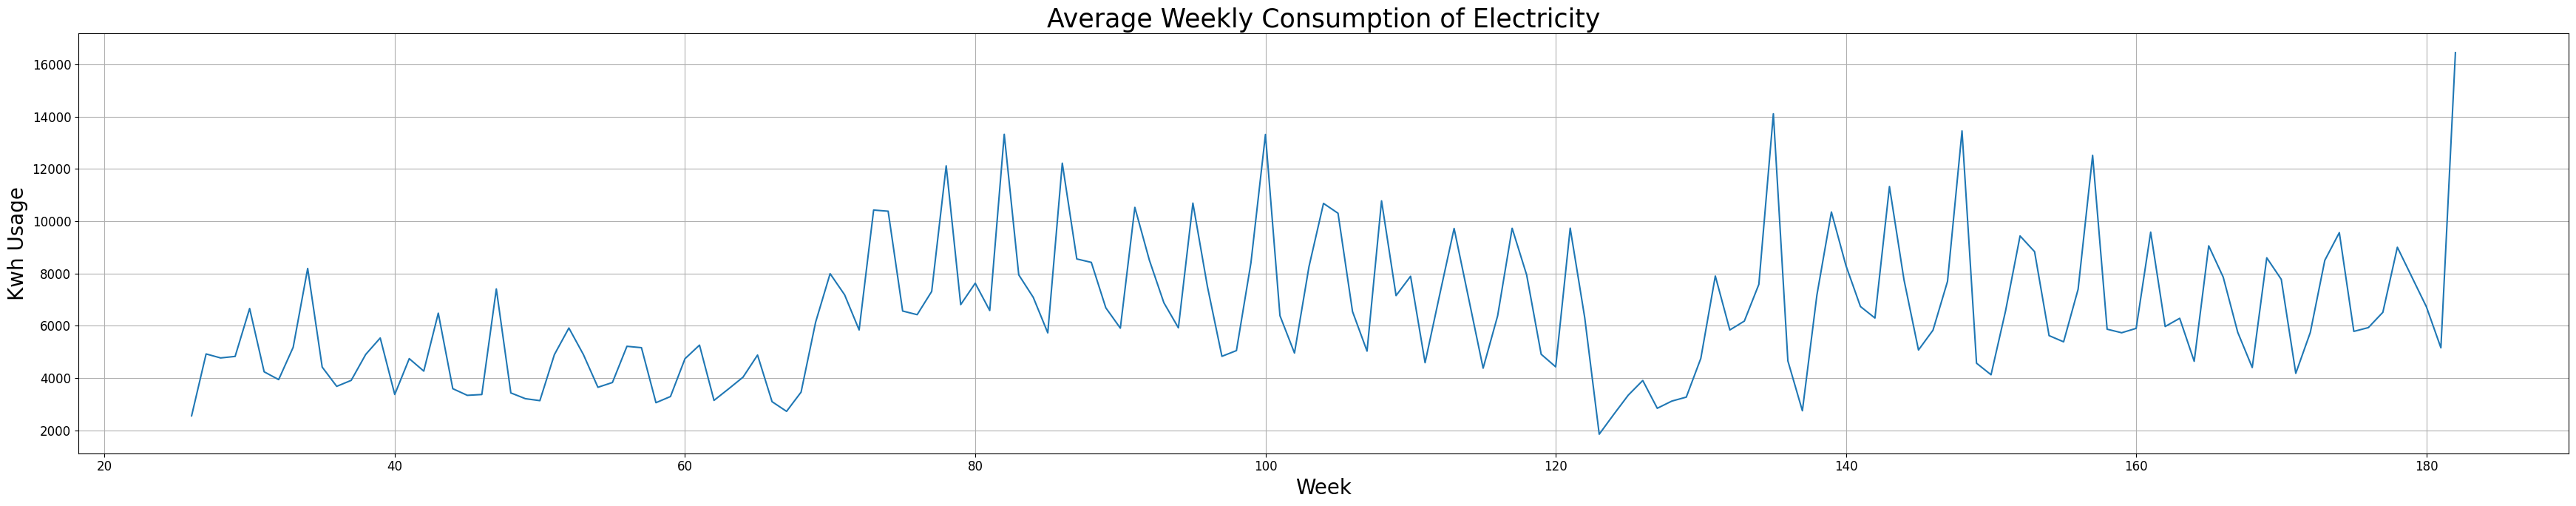

In [99]:
plt.figure(figsize=(35, 7))

plt.grid()
plt.plot(df)

plt.title('Average Weekly Consumption of Electricity', fontsize=25)
plt.xlabel('Week', fontsize=20)
plt.ylabel('Kwh Usage', fontsize=20)

plt.tight_layout()

## Check whether the series is stationary?
Stationary time series is the one whose satistical properties(mean, var, etc.) donot change over time. \

We need to perform additional check to find - 

*   if the series is stationary?
*   if there is a seasonality?
*   is the target variable correlated?

We'll use Dickey-Fuller test to check if the series is stationary and make it stationary if not.

### **Rolling Statistics Method**

In [102]:
rolling_mean = df.rolling(2).mean()
rolling_std = df.rolling(2).std()

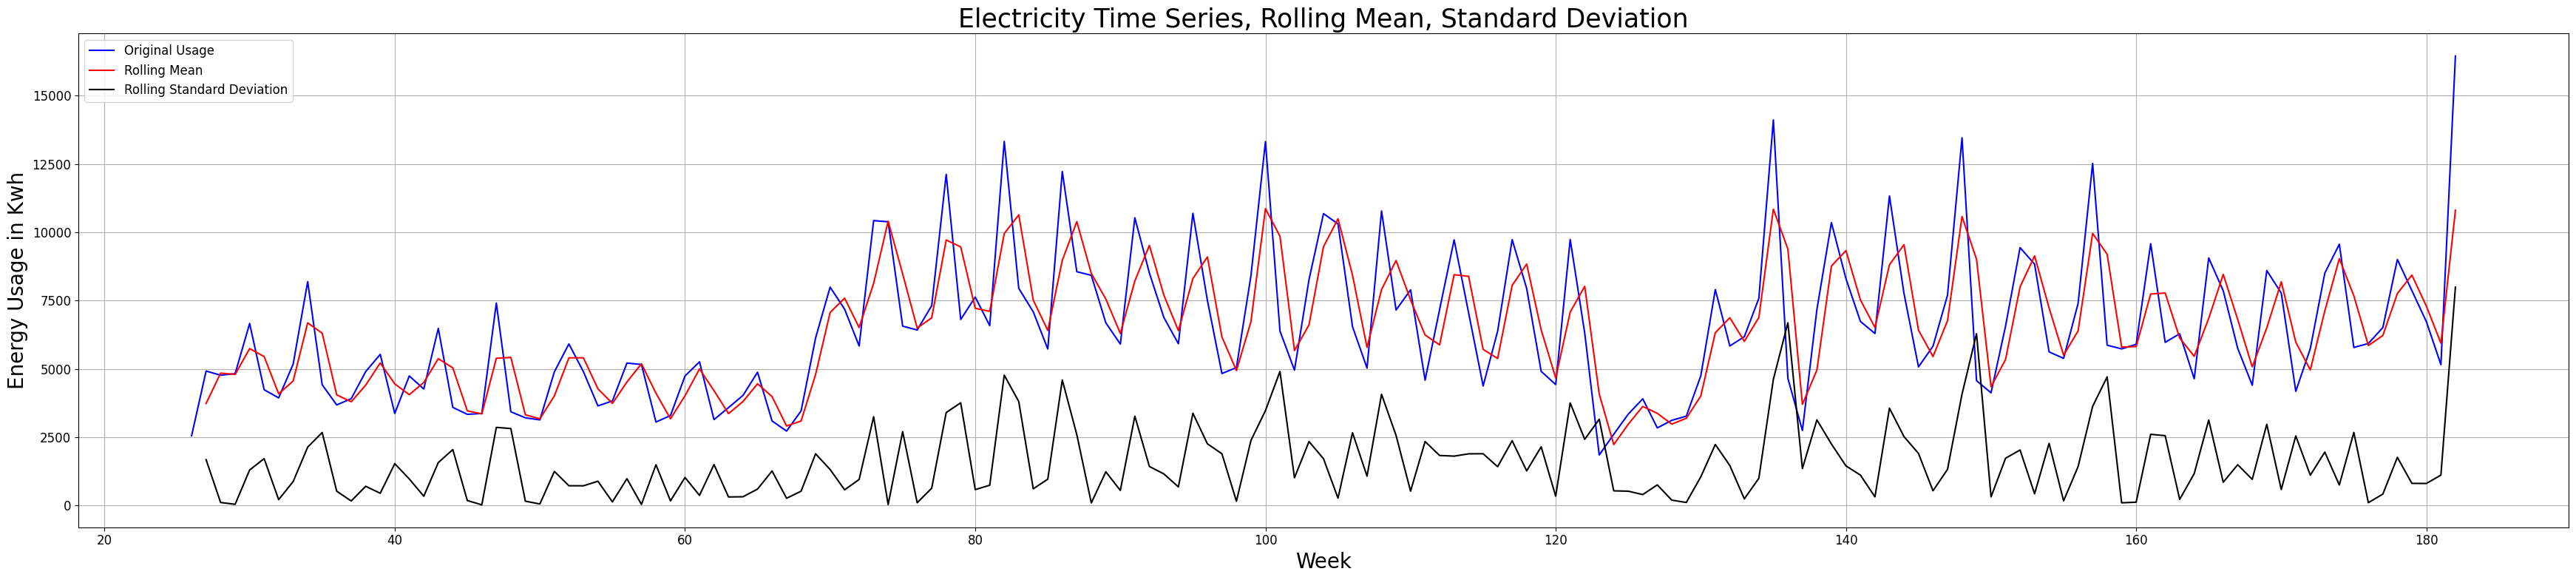

In [103]:
plt.figure(figsize=(35, 8))
plt.grid()

plt.plot(df, color="blue",label="Original Usage")
plt.plot(rolling_mean, color="red", label="Rolling Mean")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation")

plt.title('Electricity Time Series, Rolling Mean, Standard Deviation', fontsize=25)
plt.xlabel('Week', fontsize=20)
plt.ylabel('Energy Usage in Kwh', fontsize=20)

plt.legend(loc="upper left")
plt.tight_layout()

We see that statistics are not constant over the time, but to confirm we'll perform additional statistical test using augmented Dickey-Fuller method.

### **Augmented Dickey-Fuller Test:**
H0 = Null-hypothesis => It has unit root, the series is non-stationary \
H1 = Alternate-hypothesis => No unit root, the series is stationary

If p-value < critical value [0.05] -> We reject the null-hypothesis H0 \
If p-value > critical value [0.05] -> We fail to reject null-hypothesis H0

In [104]:
from statsmodels.tsa.stattools import adfuller

def aug_dickey_fuller_test(df):
  adft = adfuller(df, autolag="AIC")
  output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']], 
                            "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
  print(output_df)

In [105]:
aug_dickey_fuller_test(df)

       Values                       Metric
0   -1.831026              Test Statistics
1    0.365171                      p-value
2   12.000000             No. of lags used
3  144.000000  Number of observations used
4   -3.476598          critical value (1%)
5   -2.881829          critical value (5%)
6   -2.577589         critical value (10%)


### Dickey-Fuller Test Result:

As (Test Statistics -1.83 > -2.88 critical value (5%)), p-value > 0.05, we fail to reject the null-hypothesis, and thus the time series is non-stationary.

## Make the time series stationary

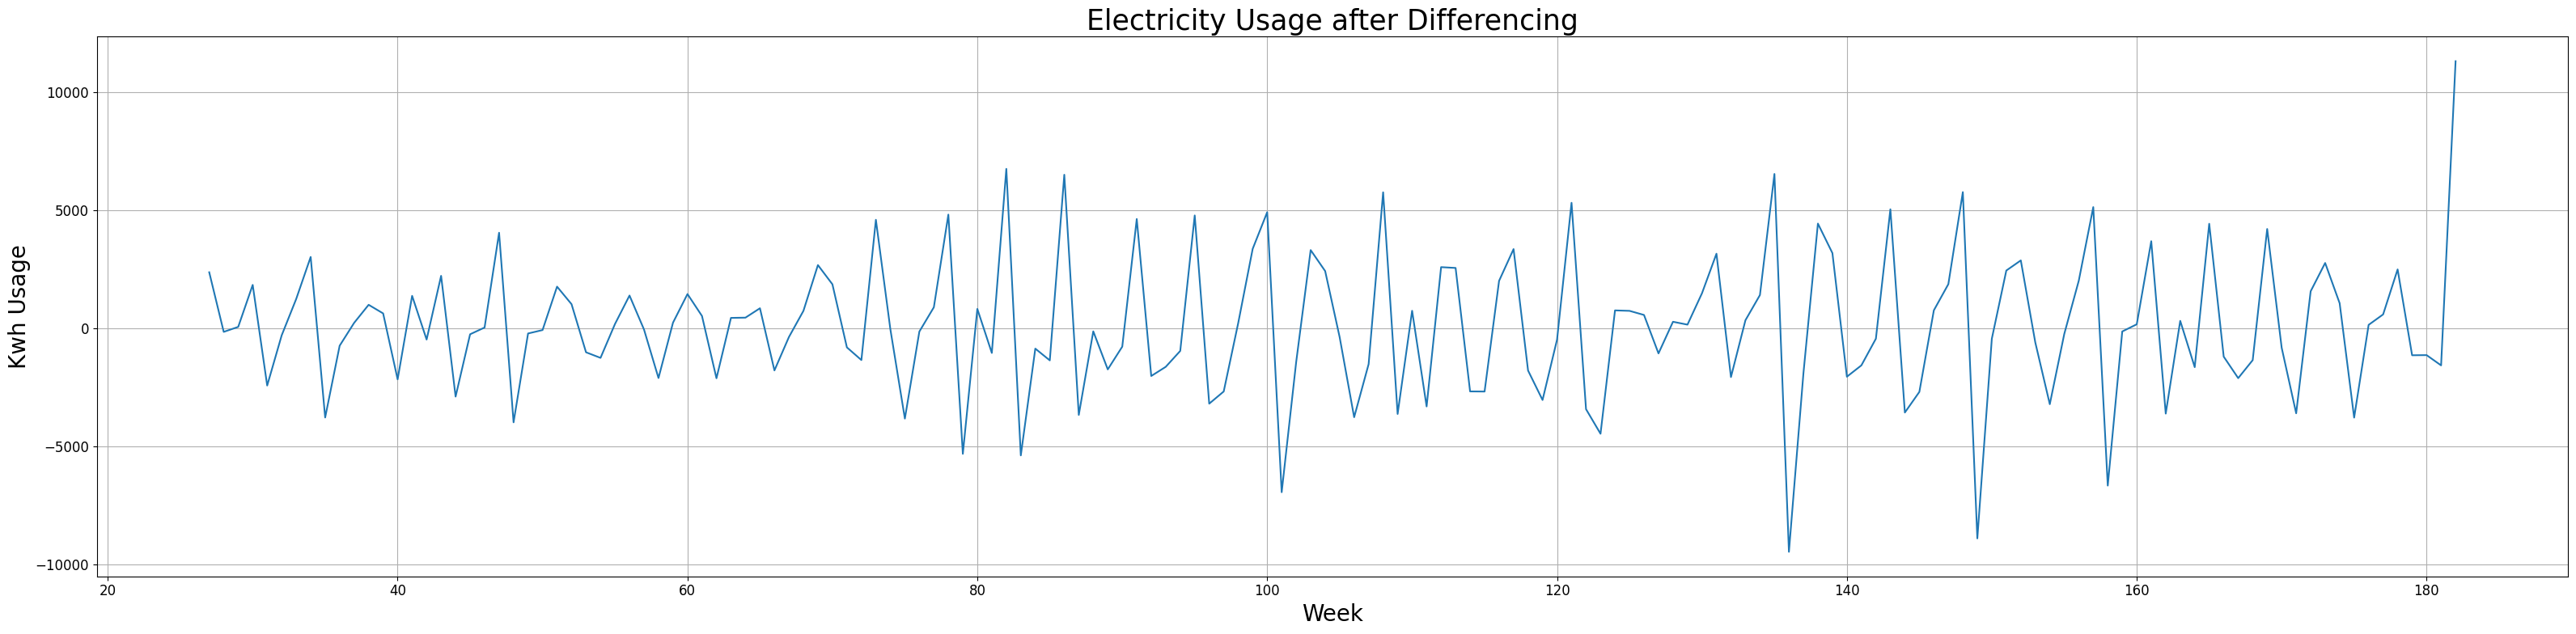

In [106]:
# First we'll perform differencing on the data to see if it becomes stationary
diff_df = df.diff()

plt.figure(figsize=(32, 8))
plt.grid()
plt.plot(diff_df)

plt.title('Electricity Usage after Differencing', fontsize=25)
plt.xlabel('Week', fontsize=20)
plt.ylabel('Kwh Usage', fontsize=20)

plt.tight_layout()

In [107]:
# Confirm with the dickey-fuller test
aug_dickey_fuller_test(diff_df.dropna())

       Values                       Metric
0   -4.550132              Test Statistics
1    0.000159                      p-value
2   11.000000             No. of lags used
3  144.000000  Number of observations used
4   -3.476598          critical value (1%)
5   -2.881829          critical value (5%)
6   -2.577589         critical value (10%)


Here, (Test Statistics = -4.55 <  critical value (5%) of -2.88), p-value is < 0.05 so we reject the null hypothesis and accept the alternate hypothesis, hence considers the **time series is stationary** for order difference of 1 (d).

# Model 1 - ARIMA - AutoRegressive Integrated Moving Average

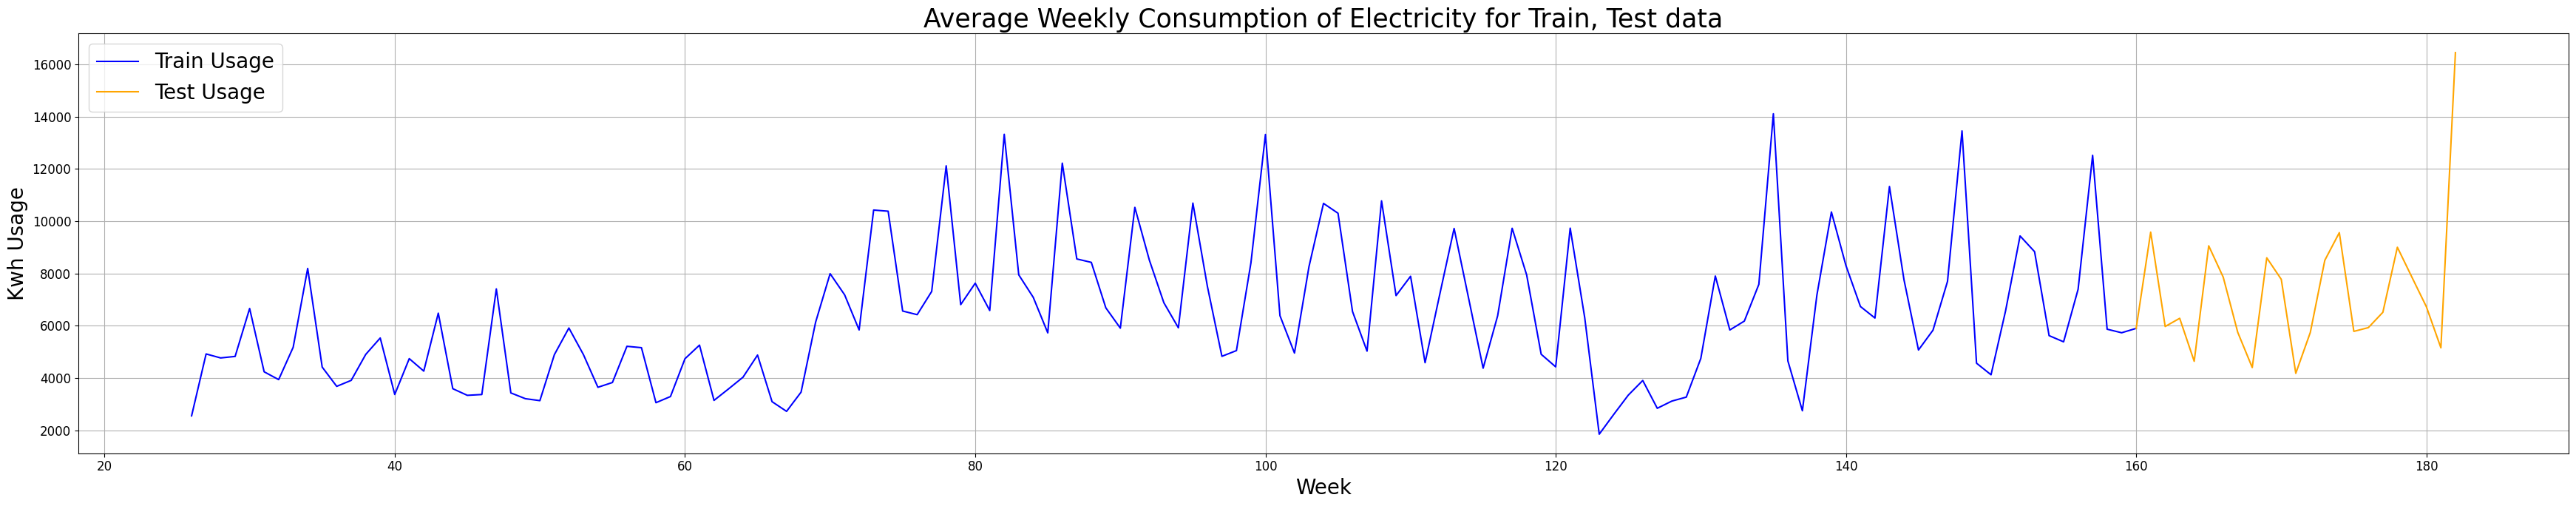

In [101]:
# Drop the index and do the sampling/ Split with the index column
# month wise data
# train_data = df.loc['2011-07':'2013-07']
# test_data = df.loc['2013-07':]

# week wise data split
train_data = df.loc['0':'160']
test_data = df.loc['160':]

plt.figure(figsize=(35, 7))
plt.grid()

plt.plot(train_data, c='blue', label='Train kwh_usage')
plt.plot(test_data, c='orange', label='Test kwh_usage')
plt.legend(loc='upper left', prop={'size':20})

plt.title('Average Weekly Consumption of Electricity for Train, Test data', fontsize=25)
plt.xlabel('Week', fontsize=20)
plt.ylabel('Kwh Usage', fontsize=20)

plt.tight_layout()

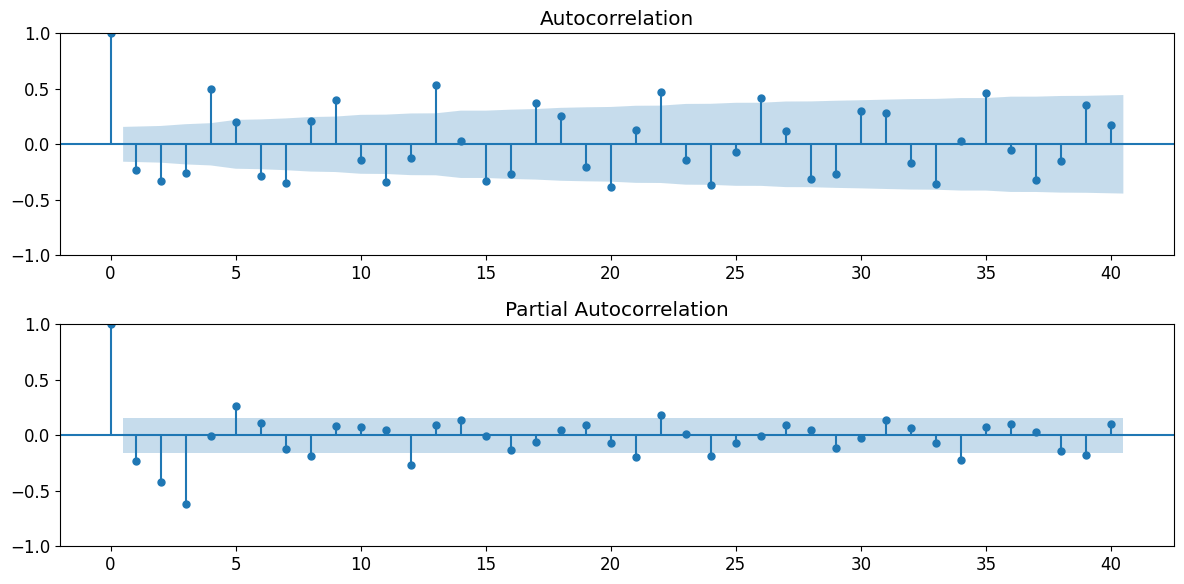

In [132]:
# Finding p - AR model lags, and q - MA lags
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize=(12, 6))
ax[0] = plot_acf(df.diff().dropna(), ax=ax[0], lags=40)
ax[1] = plot_pacf(df.diff().dropna(), ax=ax[1], lags=40)

# ax[2] = plot_acf(df.diff().dropna(), ax=ax[2])
# ax[3] = plot_pacf(df.diff().dropna(), ax=ax[3])

plt.tight_layout()

Based on above pacf and acf plots, it is confusing to get the p, q values so we'll figure it out using auto_arima function available in pmdarima module. The series was made stationary with help of 1st order differencing, so d = 1.  

In [154]:
# Find the order of the ARIMA model
order_df = auto_arima(df, trace=True, suppress_warnings=True)
order_df.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2845.007, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2947.089, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2939.772, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2885.511, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2945.228, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2884.697, Time=1.00 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2861.588, Time=0.82 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2807.713, Time=0.60 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2818.737, Time=0.34 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=2808.010, Time=1.45 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2802.027, Time=1.21 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2814.505, Time=0.48 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=2804.960, Time=0.75 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=2802.381, Time=0.81 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  157
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -1393.435
Date:                Wed, 03 May 2023   AIC                           2800.870
Time:                        21:13:31   BIC                           2822.219
Sample:                             0   HQIC                          2809.542
                                - 157                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0398      0.118     -0.337      0.736      -0.271       0.191
ar.L2         -0.9198      0.035    -26.484      0.000      -0.988      -0.852
ar.L3         -0.2937      0.117     -2.508      0.012      -0.523      -0.064
ma.L1         -0.7610      0.113     -6.758      0.000      -0.982      -0.540
ma.L2          1.0158      0.076     13.279      0.000       0.866       1.166
ma.L3         -0.4996      0.105     -4.756      0.000      -0.706      -0.294
sigma2      3.525e+06   1.35e-08   2.61e+14      0.000    3.53e+06    3.53e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                40.44
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.94   Skew:                             0.89
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.87e+30. Standard errors may be unstable.
"""

In [156]:
# With the optimised (p, d, q) based on the above pacf, differencing, and acf plots
# With the optimised (p, d, q) based on the above auto_arima results, we also know (d=1) which is identified while making the series stationary
model = ARIMA(train_data, order=(3, 1, 3)).fit()

# Prediction
# monthly
# pred = pd.DataFrame(model.predict(start=len(train_data)-1,end=(len(df)-1)), index=test_data.index)
# weekly
pred = model.predict(start=len(train_data)-1,end=(len(df)-1))

# Evaluation
# monthy evaluation
# print('Mean Absolute Error: %.2f' % mean_absolute_error(test_data, pred))
# print('Root Mean Squared Error: %.2f' % np.sqrt(mean_squared_error(test_data, pred)))
# weekly evaluation
print('Mean Absolute Error: %.2f' % mean_absolute_error(test_data['kwh_usage'].values, pred))
print('Root Mean Squared Error: %.2f' % np.sqrt(mean_squared_error(test_data['kwh_usage'], pred)))
# test_data.mean(), np.sqrt(test_data.var())

# Model Summary
model.summary()

Mean Absolute Error: 1493.04
Root Mean Squared Error: 2260.68


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              kwh_usage   No. Observations:                  135
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1193.626
Date:                Wed, 03 May 2023   AIC                           2401.252
Time:                        21:14:25   BIC                           2421.537
Sample:                             0   HQIC                          2409.495
                                - 135                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0083      0.142      0.058      0.954      -0.271       0.287
ar.L2         -0.9245      0.040    -23.401      0.000      -1.002      -0.847
ar.L3         -0.2610      0.137     -1.899      0.058      -0.530       0.008
ma.L1         -0.7966      0.151     -5.282      0.000      -1.092      -0.501
ma.L2          1.0392      0.100     10.400      0.000       0.843       1.235
ma.L3         -0.4557      0.126     -3.607      0.000      -0.703      -0.208
sigma2      3.384e+06   2.39e-09   1.42e+15      0.000    3.38e+06    3.38e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.02
Prob(Q):                              0.99   Prob(JB):                         0.08
Heteroskedasticity (H):               2.03   Skew:                             0.46
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.06e+32. Standard errors may be unstable.
"""

In [157]:
pred = pd.Series(list(pred.values), index=list(test_data.index))

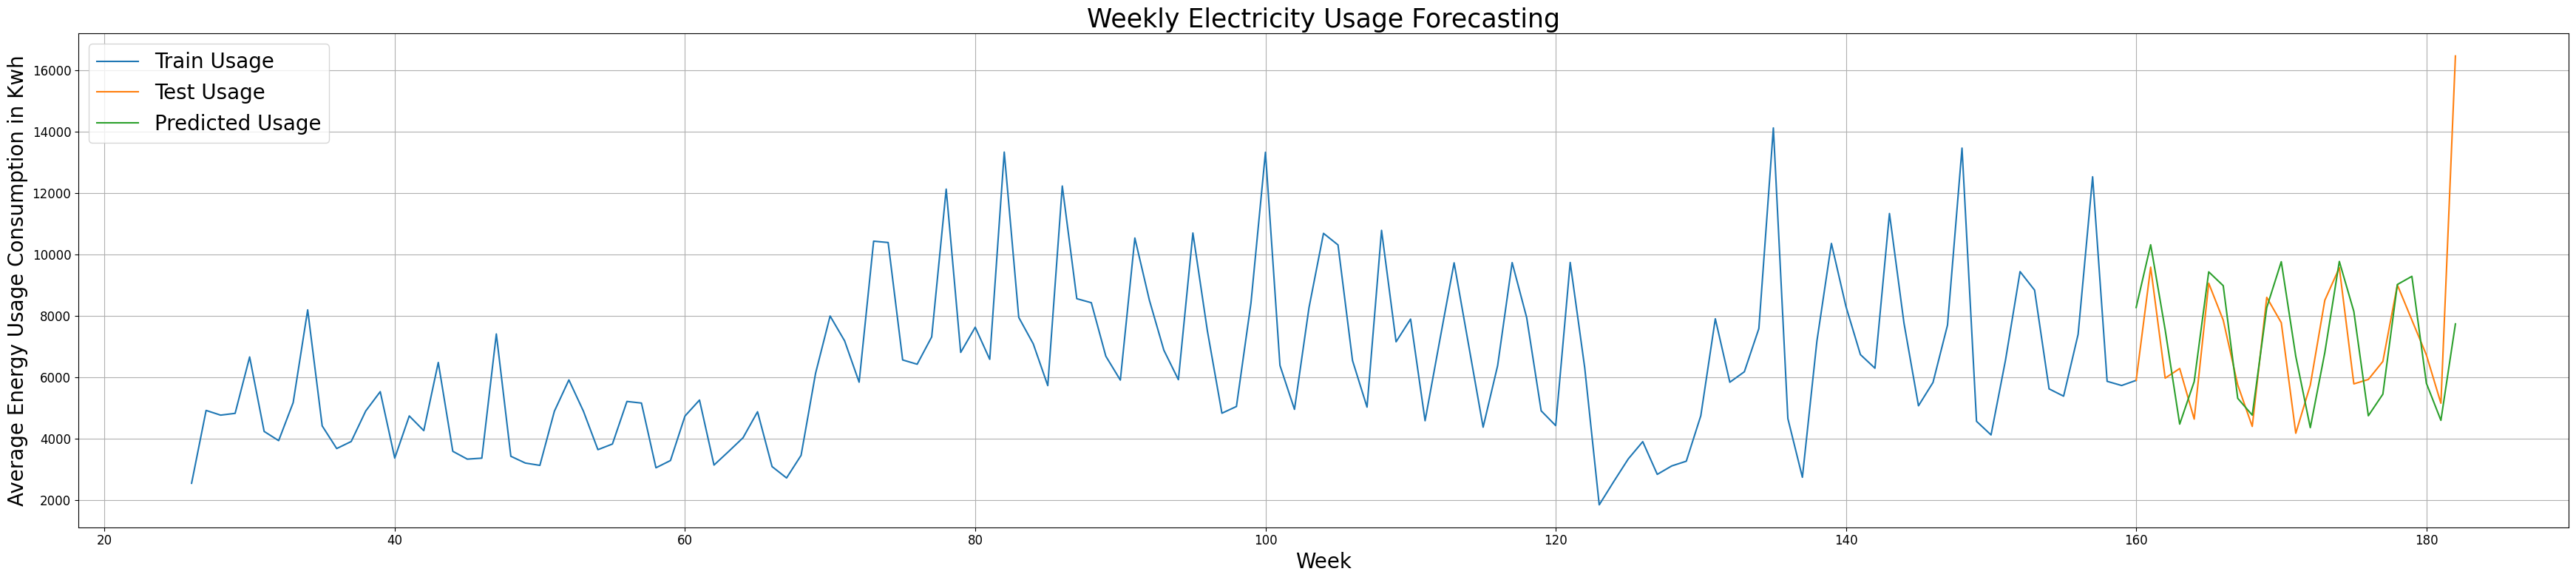

In [158]:
plt.figure(figsize=(35, 8))
plt.grid()

plt.plot(train_data, label = 'Train kwh_usage')
plt.plot(test_data, label = 'Test kwh_usage')
plt.plot(pred, label = 'Predicted kwh_usage')

plt.title('Weekly Electricity Usage Forecasting', fontsize=25)
plt.xlabel('Week', fontsize=20)
plt.ylabel('Average Energy Usage Consumption in Kwh', fontsize=20)
plt.legend(loc='upper left', prop={'size': 20})
plt.tight_layout()

# VAR Model 2 - Vector AutoRegressive

In [205]:
# week wise data
var_df = data_df[['week', 'total_due', 'kwh_usage']]
group_df = var_df.groupby(['week']).mean()
group_df.head()

,total_due,kwh_usage
week,,
26,268.868832,2550.591241
27,464.182201,4920.168111
28,485.122756,4767.283350
29,482.147311,4825.196879
30,692.739667,6660.206659


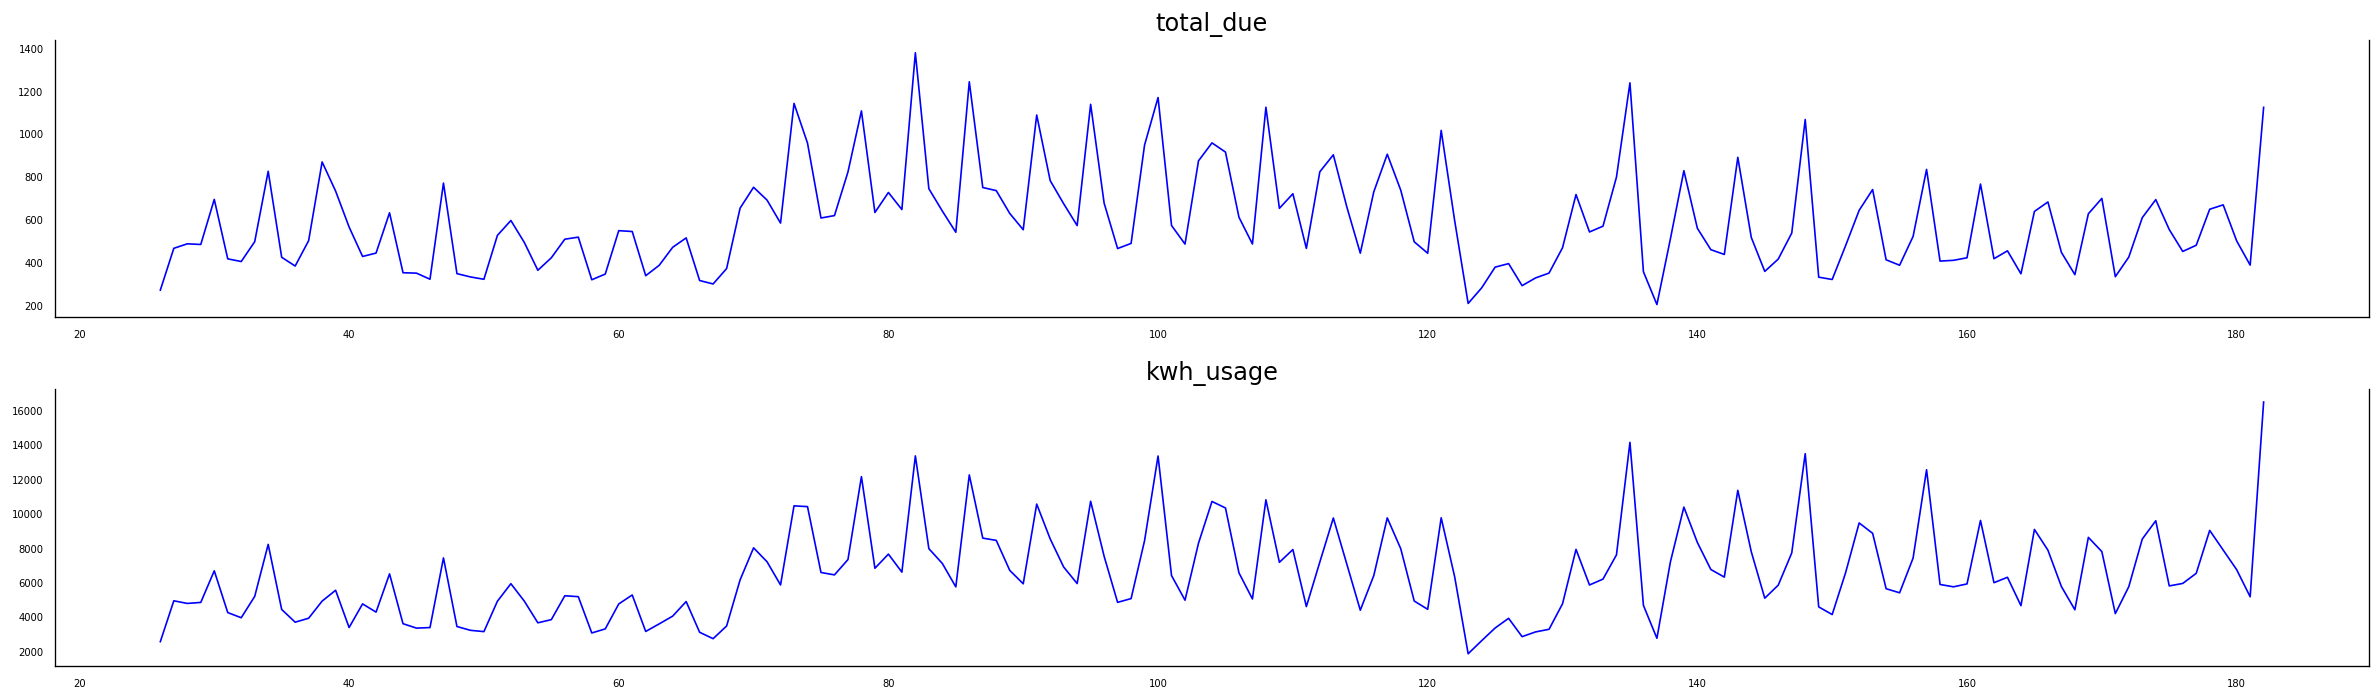

In [206]:
fig, axes = plt.subplots(nrows=2, ncols=1, dpi=120, figsize=(20,6))
for i, ax in enumerate(axes.flatten()):
    # data = var_df['bill_date', var_df.columns[i]].groupby('bill_date').mean()
    data = group_df[group_df.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
    
    # Decorations
    ax.set_title(group_df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [207]:
print('kwh_usage augmented dickey-fuller test:')
aug_dickey_fuller_test(group_df['kwh_usage'])
print('\n')
print('total_due augmented dickey-fuller test:')
aug_dickey_fuller_test(group_df['total_due'])

kwh_usage augmented dickey-fuller test:
       Values                       Metric
0   -1.831026              Test Statistics
1    0.365171                      p-value
2   12.000000             No. of lags used
3  144.000000  Number of observations used
4   -3.476598          critical value (1%)
5   -2.881829          critical value (5%)
6   -2.577589         critical value (10%)


total_due augmented dickey-fuller test:
       Values                       Metric
0   -1.710329              Test Statistics
1    0.425798                      p-value
2   12.000000             No. of lags used
3  144.000000  Number of observations used
4   -3.476598          critical value (1%)
5   -2.881829          critical value (5%)
6   -2.577589         critical value (10%)


In [ ]:
# Perform one order differecing and see if it becomes stationary and confirm with the dickey-fuller test
print('kwh_usage adf test on diff data:')
aug_dickey_fuller_test(group_df['kwh_usage'].diff().dropna())
print('\n')
print('total_due adf test on diff data:')
aug_dickey_fuller_test(group_df['total_due'].diff().dropna())

One order differencing of kwh_usage, total_due made the series stationary

In [208]:
print('kwh_usage causes total_due?\n')
print('------------------')
granger_1 = grangercausalitytests(group_df[['kwh_usage', 'total_due']], 4)

print('\n total_due causes kwh_usage?\n')
print('------------------')
granger_2 = grangercausalitytests(group_df[['total_due', 'kwh_usage']], 4)

kwh_usage causes total_due?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4014  , p=0.5273  , df_denom=153, df_num=1
ssr based chi2 test:   chi2=0.4092  , p=0.5224  , df=1
likelihood ratio test: chi2=0.4087  , p=0.5226  , df=1
parameter F test:         F=0.4014  , p=0.5273  , df_denom=153, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.4939  , p=0.0329  , df_denom=150, df_num=2
ssr based chi2 test:   chi2=7.2208  , p=0.0270  , df=2
likelihood ratio test: chi2=7.0577  , p=0.0293  , df=2
parameter F test:         F=3.4939  , p=0.0329  , df_denom=150, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.2156  , p=0.0888  , df_denom=147, df_num=3
ssr based chi2 test:   chi2=6.9634  , p=0.0731  , df=3
likelihood ratio test: chi2=6.8106  , p=0.0782  , df=3
parameter F test:         F=2.2156  , p=0.0888  , df_denom=147, df_num=3

Granger Causality
number of lags (no zero) 4


In [209]:
# month wise split
# train_data = pd.DataFrame(final_df.loc['2011-07-01':'2013-12-31'])
# test_data =  pd.DataFrame(final_df['2014-01-01':])

# week wise data split
train_data = group_df.loc['0':'160']
test_data = group_df.loc['160':]

print(test_data.shape, train_data.shape, train_data.head())

(23, 2) (135, 2)        total_due    kwh_usage
week                         
26    268.868832  2550.591241
27    464.182201  4920.168111
28    485.122756  4767.283350
29    482.147311  4825.196879
30    692.739667  6660.206659


In [210]:
model = VAR(train_data)

In [211]:
order = model.select_order(maxlags=20)
print(order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        24.84       24.89   6.145e+10       24.86
1        24.17       24.31   3.142e+10       24.23
2        24.01       24.25   2.680e+10       24.11
3        23.91       24.24   2.412e+10       24.04
4        23.27      23.70*   1.273e+10       23.44
5        23.23       23.75   1.224e+10      23.44*
6        23.25       23.87   1.256e+10       23.50
7        23.25       23.96   1.250e+10       23.54
8        23.23       24.05   1.236e+10       23.56
9        23.15       24.06   1.139e+10       23.52
10       23.13       24.13   1.120e+10       23.54
11       23.17       24.26   1.163e+10       23.61
12       23.20       24.40   1.211e+10       23.69
13      23.01*       24.30  1.003e+10*       23.53
14       23.05       24.44   1.051e+10       23.62
15       23.03       24.51   1.031e+10       23.63
16       23.05       24.63   1.

Based on the above results, the minimum vaues of AIC, FPE are observed at lag-13, so the lag to be choosen is 13.

In [212]:
var_model = VARMAX(train_data, order=(13, 0), enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                               Statespace Model Results                               
Dep. Variable:     ['total_due', 'kwh_usage']   No. Observations:                  135
Model:                                VAR(13)   Log Likelihood               -1914.555
                                  + intercept   AIC                           3943.111
Date:                        Wed, 03 May 2023   BIC                           4108.712
Time:                                21:49:25   HQIC                          4010.406
Sample:                                     0                                         
                                        - 135                                         
Covariance Type:                          opg                                         
Ljung-Box (L1) (Q):             0.00, 0.54   Jarque-Bera (JB):         5.65, 149.67
Prob(Q):                        0.98, 0.46   Prob(JB):                   0.06, 0.00
Heteroskedasticity (H):         2.35, 0.84   Skew

In [219]:
pred = fitted_model.get_prediction(start=len(train_data)-1,end=len(group_df)-1)
predictions = pred.predicted_mean

In [220]:
predictions.columns=['total_due', 'kwh_usage']
predictions.index = test_data.index

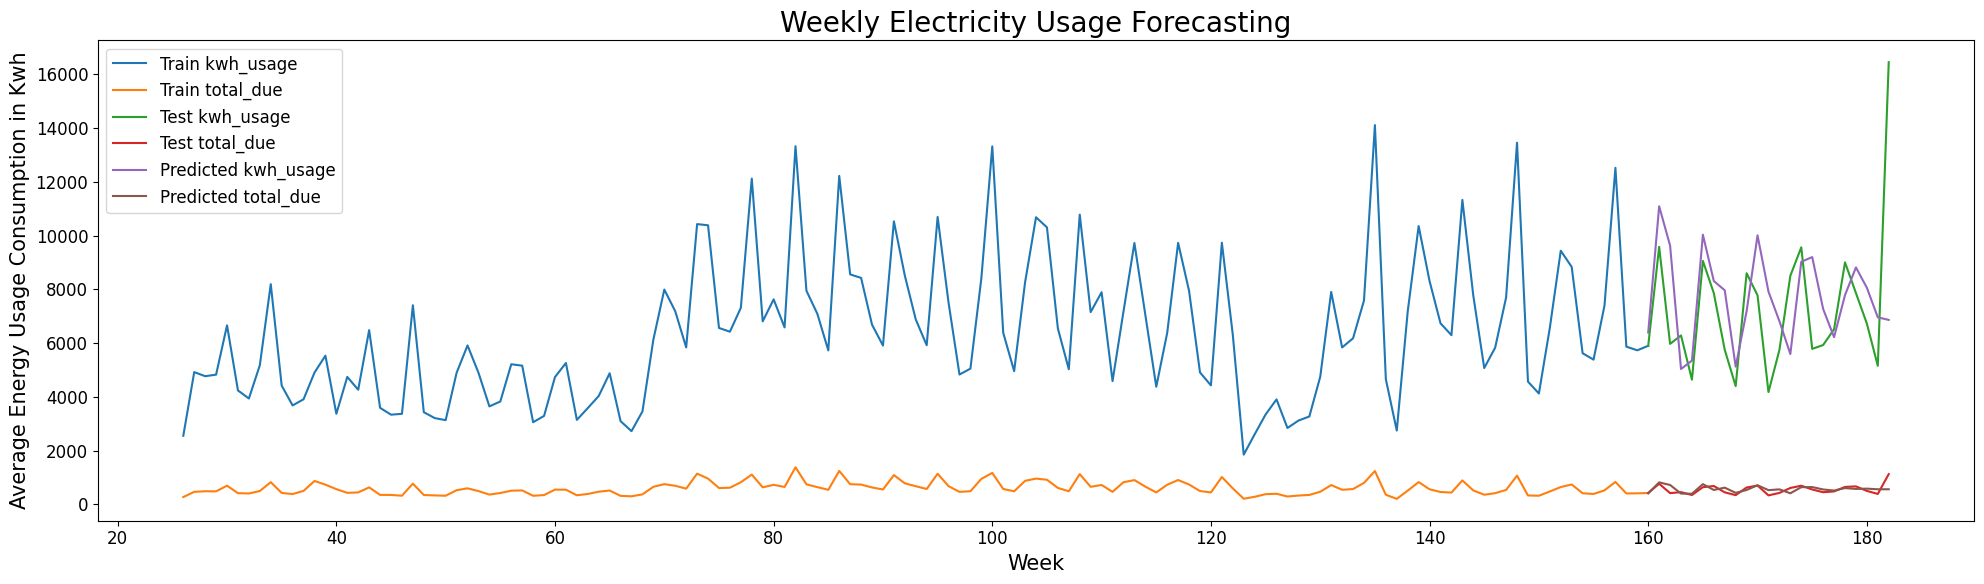

In [221]:
# test_vs_pred = pd.concat([test_data, predictions], axis=1)

plt.figure(figsize=(20, 6))
plt.plot(train_data['kwh_usage'], label = 'Train kwh_usage')
plt.plot(train_data['total_due'], label = 'Train total_due')
plt.plot(test_data['kwh_usage'], label = 'Test kwh_usage')
plt.plot(test_data['total_due'], label = 'Test total_due')
plt.plot(predictions['kwh_usage'], label = 'Predicted kwh_usage')
plt.plot(predictions['total_due'], label = 'Predicted total_due')

plt.legend(loc='upper left')
plt.title('Weekly Electricity Usage Forecasting', fontsize=20)
plt.xlabel('Week', fontsize=15)
plt.ylabel('Average Energy Usage Consumption in Kwh', fontsize=15)
plt.tight_layout()
# indx = test_data.index.strftime("%Y-%m-%d").tolist()
# plt.xticks(indx, rotation=90)

In [222]:
# Calculating the root mean squared error
rmse_kwh_usage = math.sqrt(mean_squared_error(predictions['kwh_usage'],test_data['kwh_usage']))
print('Mean value of kwh_usage is : {}. Root Mean Squared Error is :{}'.format(mean(test_data['kwh_usage']), rmse_kwh_usage))

rmse_total_due = math.sqrt(mean_squared_error(predictions['total_due'],test_data['total_due']))
print('Mean value of total_due is : {}. Root Mean Squared Error is :{}'.format(mean(test_data['total_due']), rmse_total_due))

Mean value of kwh_usage is : 7270.807960167654. Root Mean Squared Error is :2706.3394255892267
Mean value of total_due is : 551.2324396222277. Root Mean Squared Error is :169.7645963206738


# LSTM Model

In [224]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# plt.rcParams.update({'font.size': 12})
# lstm = pd.read_csv('Electricity_Usage_Data.csv', index_col='bill_date', parse_dates=True)

# address_enc = LabelEncoder()
# bill_type_enc = LabelEncoder()

# lstm['address_enc'] = address_enc.fit_transform(lstm['service_address'])
# lstm['bill_type_enc'] = bill_type_enc.fit_transform(lstm['bill_type'])

In [ ]:
# daily - not performing great
# lstm_df = pd.DataFrame(lstm['kwh_usage'], index=lstm.index)
# lstm_df = lstm_df.resample('D').mean()
# lstm_df.head()

In [ ]:
# # monthly
# lstm_df = pd.DataFrame(lstm['kwh_usage'], index=lstm.index)
# lstm_df = lstm_df.resample('MS').mean()
# len(lstm_df), lstm_df.head()

(36,
               kwh_usage
 bill_date              
 2011-07-01  5197.328592
 2011-08-01  5084.681463
 2011-09-01  4534.998906
 2011-10-01  4653.552477
 2011-11-01  4000.220911)

In [ ]:
# indx = lstm_df.loc['2011-07-01':].index.strftime("%Y-%m-%d").tolist()

In [263]:
# added
lstm_df = data_df[['kwh_usage', 'week']]
lstm_df = lstm_df.groupby('week').mean()
lstm_df.shape, lstm_df.head()

((157, 1),
         kwh_usage
 week             
 26    2550.591241
 27    4920.168111
 28    4767.283350
 29    4825.196879
 30    6660.206659)

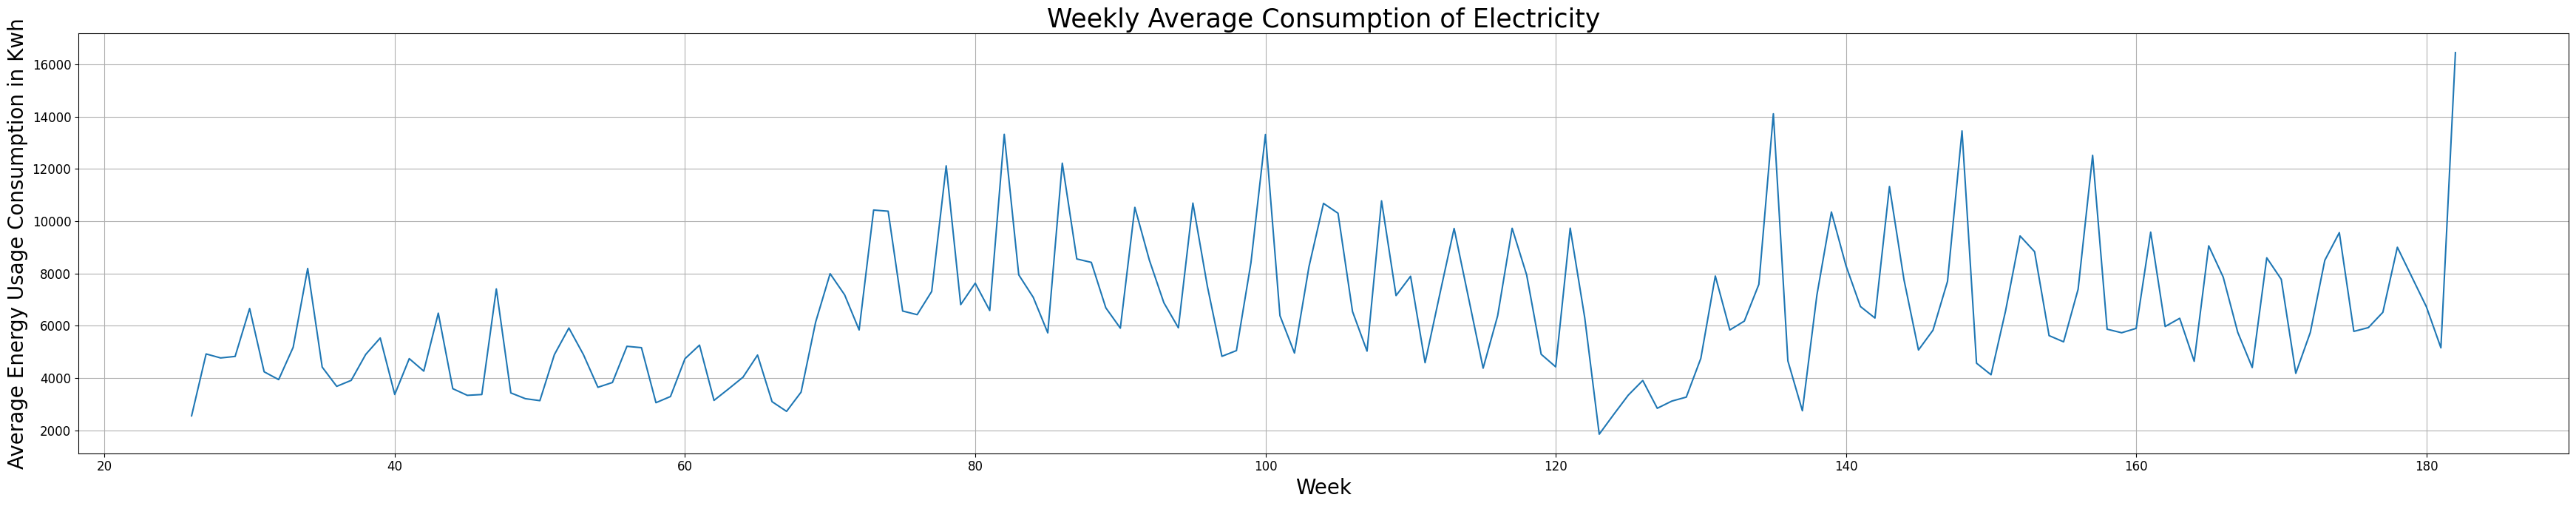

In [264]:
plt.figure(figsize=(35, 7))

plt.grid()
plt.plot(lstm_df)

plt.title('Weekly Average Consumption of Electricity', fontsize=25)
plt.xlabel('Week', fontsize=20)
plt.ylabel('Average Energy Usage Consumption in Kwh', fontsize=20)
# plt.xticks(indx, rotation=90)

plt.tight_layout()

In [265]:
# lstm_df['kwh_usage'] = lstm_df['kwh_usage'].dropna()

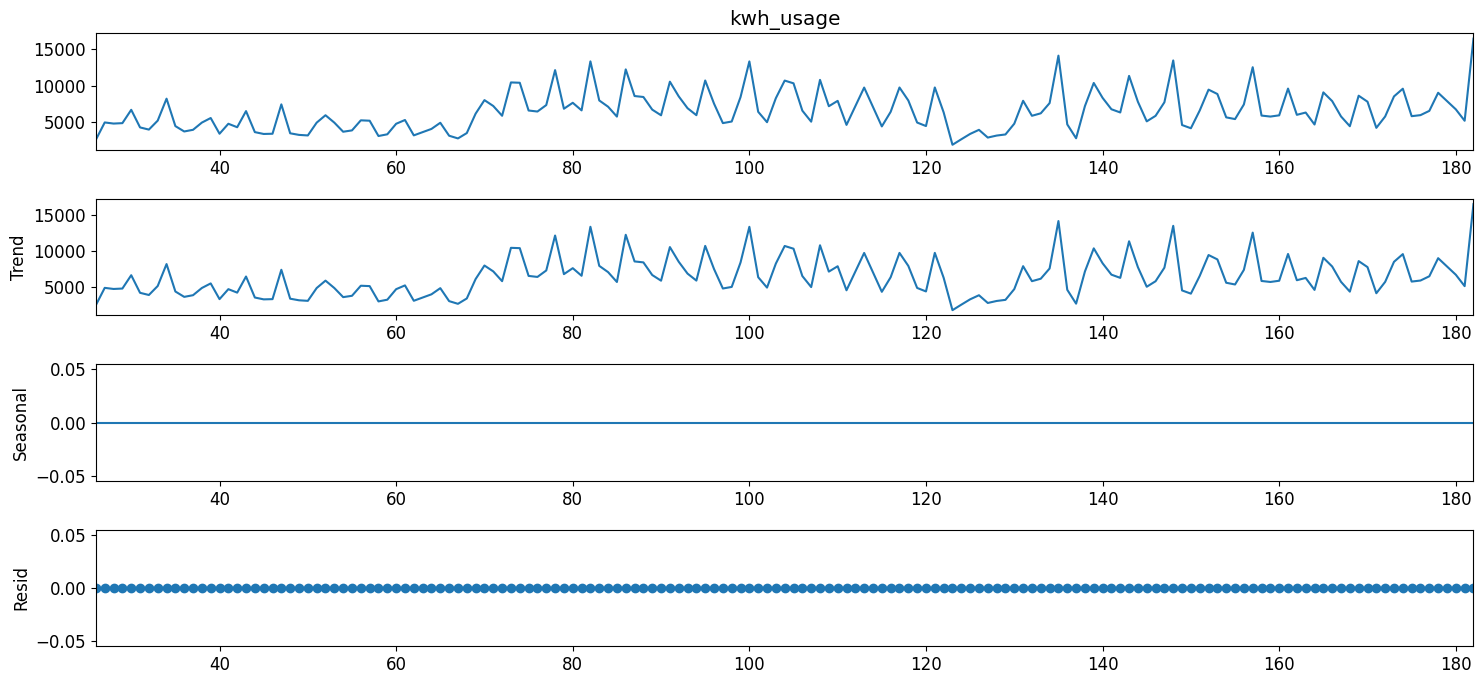

In [266]:
res = seasonal_decompose(lstm_df['kwh_usage'].dropna(), period=1)
fig = res.plot()
fig.set_size_inches((15, 7))
# plt.xlabel(indx, rotation=90)
fig.tight_layout()
plt.show()

In [267]:
# monthly split
# train_data = lstm_df.dropna().loc['2011-07-01':'2013-12-01']
# test_data = lstm_df.dropna().loc['2014-01-01':]

# week wise data split
train_data = lstm_df.loc['0':'160']
test_data = lstm_df.loc['160':]

In [269]:
lstm_df.head(), lstm_df.tail()

(        kwh_usage
 week             
 26    2550.591241
 27    4920.168111
 28    4767.283350
 29    4825.196879
 30    6660.206659,
          kwh_usage
 week              
 178    9003.851217
 179    7861.631993
 180    6725.175489
 181    5154.602378
 182   16454.560694)

In [268]:
scaler = MinMaxScaler()

In [270]:
scaler.fit(train_data)
scaled_train = scaler.transform(train_data)
scaled_test = scaler.transform(test_data)

In [284]:
# define generator
n_input = 15
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
     
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.05726747 0.25047208 0.23800654 0.24272855 0.39234697 0.19474895
 0.1703378  0.27122726 0.51728633 0.20947108 0.1492983  0.16804037
 0.24900017 0.30026072 0.12396093]
Predict this y: 
 [[0.23582726]]


In [285]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [286]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100)               40800     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [287]:
# fit model
model.fit(generator, epochs=50)

Epoch 1/50
120/120 [==============================] - 3s 9ms/step - loss: 0.0572
Epoch 2/50
120/120 [==============================] - 1s 10ms/step - loss: 0.0442
Epoch 3/50
120/120 [==============================] - 1s 9ms/step - loss: 0.0434
Epoch 4/50
120/120 [==============================] - 1s 9ms/step - loss: 0.0445
Epoch 5/50
120/120 [==============================] - 2s 13ms/step - loss: 0.0450
Epoch 6/50
120/120 [==============================] - 2s 14ms/step - loss: 0.0419
Epoch 7/50
120/120 [==============================] - 1s 9ms/step - loss: 0.0435
Epoch 8/50
120/120 [==============================] - 1s 9ms/step - loss: 0.0415
Epoch 9/50
120/120 [==============================] - 1s 10ms/step - loss: 0.0420
Epoch 10/50
120/120 [==============================] - 1s 9ms/step - loss: 0.0422
Epoch 11/50
120/120 [==============================] - 1s 10ms/step - loss: 0.0413
Epoch 12/50
120/120 [==============================] - 1s 9ms/step - loss: 0.0423
Epoch 13/50
120/120 

Text(0, 0.5, 'Loss')

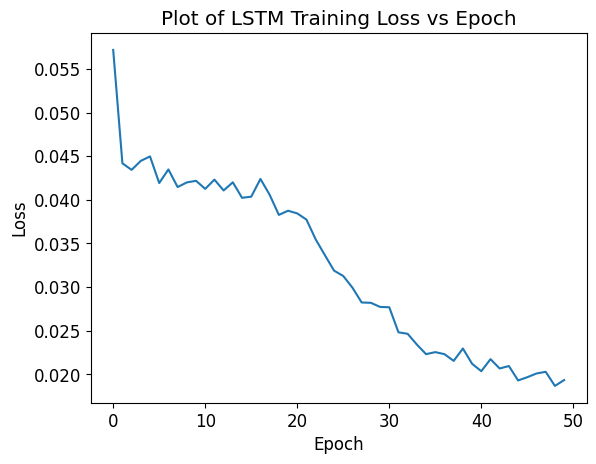

In [288]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

plt.title('Plot of LSTM Training Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

As we can see the loss is decreasing at each epoch.

In [290]:
last_train_batch = scaled_train[-15:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model.predict(last_train_batch)

1/1 [==============================] - 0s 382ms/step


array([[0.6565126]], dtype=float32)

In [291]:
test_preds = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):
    # get pred value for first batch
    current_pred = model.predict(current_batch)[0]
    # add preds into test_predictions[]
    test_preds.append(current_pred) 
    # use pred to update the batch and remove 1st value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 30ms/step


In [292]:
true_predictions = scaler.inverse_transform(test_preds)
test_data['predictions'] = true_predictions
test_data.head()

,kwh_usage,predictions
week,,
160,5898.957041,9900.092247
161,9581.774648,10055.923085
162,5970.767668,5848.079246
163,6284.315389,5497.072963
164,4638.139744,8447.522536


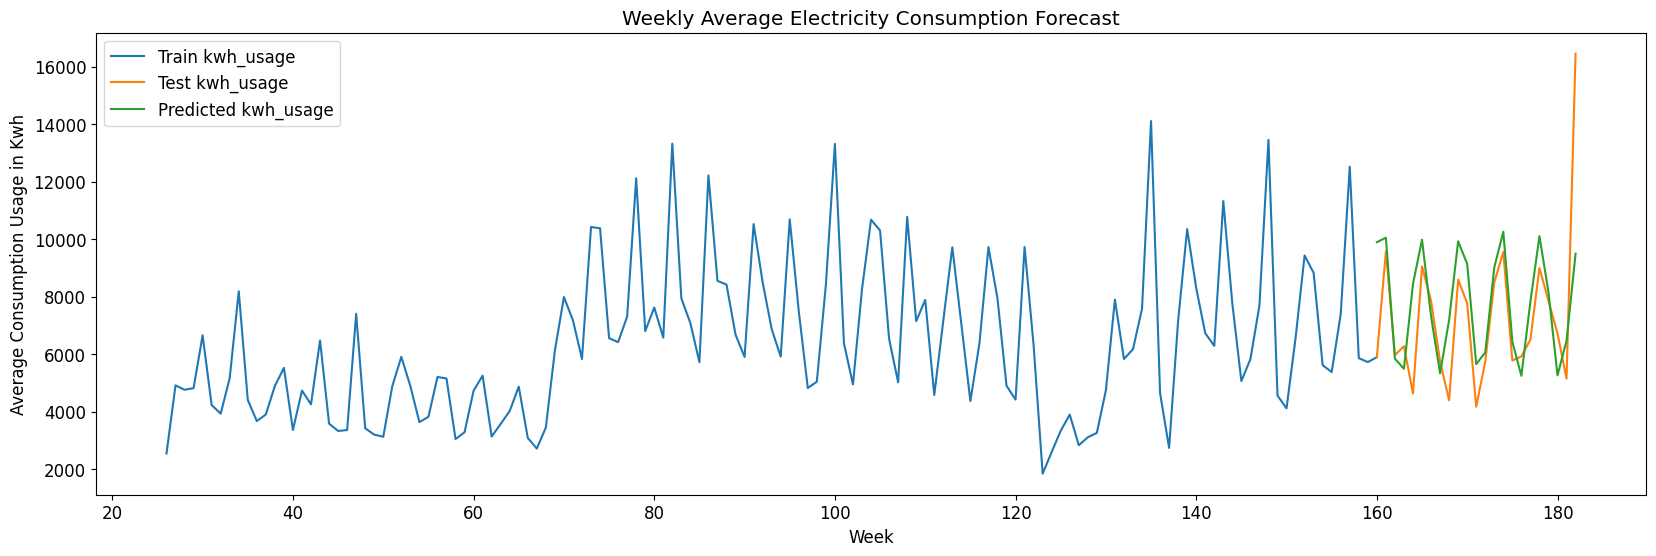

In [293]:
# test_data.plot(figsize=(14,5))
plt.figure(figsize=(20, 6))
plt.plot(train_data, label='Train kwh_usage')
plt.plot(test_data['kwh_usage'], label='Test kwh_usage')
plt.plot(test_data['predictions'], label='Predicted kwh_usage')

plt.legend(loc='upper left')
plt.title('Weekly Average Electricity Consumption Forecast')
plt.xlabel('Week')
plt.ylabel('Average Consumption Usage in Kwh')
plt.show()

We have taken previous 15 values to predict the future values becuase it would enough data for predictions. The model performed better for the past values = 15 that is close to three and half months as we considered data in week wise manner.

In [294]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test_data['kwh_usage'],test_data['predictions']))
print(rmse) 

2120.1214701804342


# Visualizations

In [ ]:
data_main = pd.read_csv('Electricity_Usage_Data.csv')

In [ ]:
data_main[['bill_date']] = data_main[['bill_date']].apply(pd.to_datetime)

In [ ]:
data_main.loc[:,'bill_date'] = data_main['bill_date'].apply(lambda x: pd.to_datetime(f'{x.year}-{x.month}-01'))

In [ ]:
viz_df = data_main.set_index('bill_date')

In [ ]:
viz_df.head()

,esid,business_area,service_address,bill_type,total_due,kwh_usage
bill_date,,,,,,
2012-06-01,1008901000140050014100,2000,10518 BELLAIRE,T,73232.11,905421.0
2012-05-01,1008901000140050014100,2000,10518 BELLAIRE,T,68463.46,824107.0
2012-04-01,1008901000140050014100,2000,10518 BELLAIRE,T,80847.87,977744.0
2012-03-01,1008901000140050014100,2000,10518 BELLAIRE,T,74373.93,876838.0
2012-02-01,1008901000140050014100,2000,10518 BELLAIRE,T,74080.27,872898.0


### Visualization #1 - Hyndavi

In [7]:
import time
from pprint import pprint

In [8]:
data_main = pd.read_csv('Electricity_Usage_Data.csv')

In [9]:
data_main[['bill_date']] = data_main[['bill_date']].apply(pd.to_datetime)

In [10]:
data_main.loc[:,'bill_date'] = data_main['bill_date'].apply(
    lambda x: pd.to_datetime(f'{x.year}-{x.month}-01')
)

<ipython-input-10-be7a051f03b7>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_main.loc[:,'bill_date'] = data_main['bill_date'].apply(


In [11]:
viz_df = data_main.set_index('bill_date')
viz_df.head()

,esid,business_area,service_address,bill_type,total_due,kwh_usage
bill_date,,,,,,
2012-02-01,1008901000140220013100,2500,17000 ALDINE WFLD,T,10612.81,100461.0
2012-01-01,1008901000140220013100,2500,17000 ALDINE WFLD,T,11689.34,117843.0
2011-12-01,1008901000140220013100,2500,17000 ALDINE WFLD,T,11173.67,115471.0
2012-06-01,1008901000141370015100,2000,449 W 19TH,T,6457.79,79984.0
2012-05-01,1008901000141370015100,2000,449 W 19TH,T,5809.91,69067.0


In [12]:
address_enc = LabelEncoder()
bill_type_enc = LabelEncoder()

data_main['address_enc'] = address_enc.fit_transform(
    data_main['service_address']
)
data_main['bill_type_enc'] = bill_type_enc.fit_transform(
    data_main['bill_type']
)
data_main['year'] = data_main['bill_date'].apply(lambda x:x.year)
data_main['month'] = data_main['bill_date'].apply(lambda x:x.month)

<ipython-input-13-72e3d06544aa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_main.corr())


<Axes: >

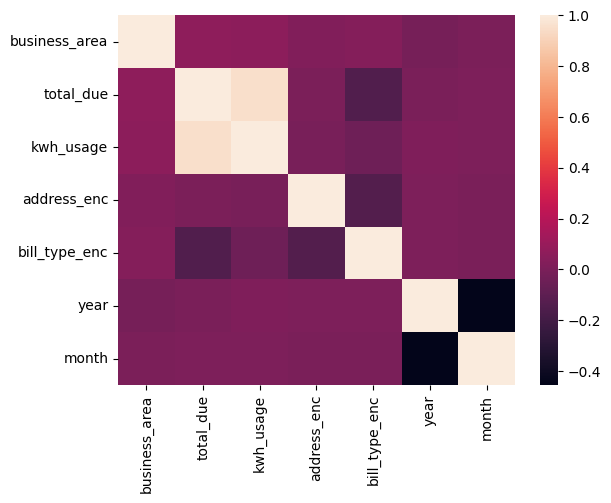

In [13]:
sns.heatmap(data_main.corr())

There do not seem to be any features that have high correlation with kwh usage except total due. But this is to be expected since the amount of energy used is directly proportional to the cost.

It might be difficult to use the features as they are for ML modeling.

In [14]:
def plotbox(df, column):
    plot_features = df.groupby(pd.Grouper(freq=str(60)+'T')).mean().copy()
    plot_features[column] = [eval('x.%s'%column) for x in plot_features.index] 
    plot_features.boxplot('kwh_usage', by=column, figsize=(12, 8), grid=False)
    plt.ylabel('kWh Usage')
    plt.xlabel(column)
    plt.show()

value_counts:
 T    187663
P      1297
C        11
Name: bill_type, dtype: int64


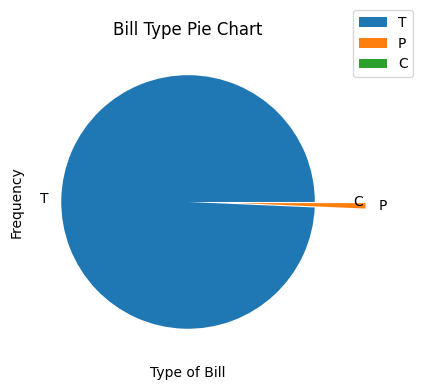

In [83]:
# Pie chart for 'Bill Type'
explode = (0, 0.4, 0.2)
plt.figure(figsize=(5, 4))
print('value_counts:\n', data_main['bill_type'].value_counts())
data_main['bill_type'].value_counts().plot(kind='pie', explode=explode) #, autopct='%1.10f%%')
plt.title('Bill Type Pie Chart')
plt.xlabel('Type of Bill')
plt.ylabel('Frequency')
plt.legend(loc='center left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

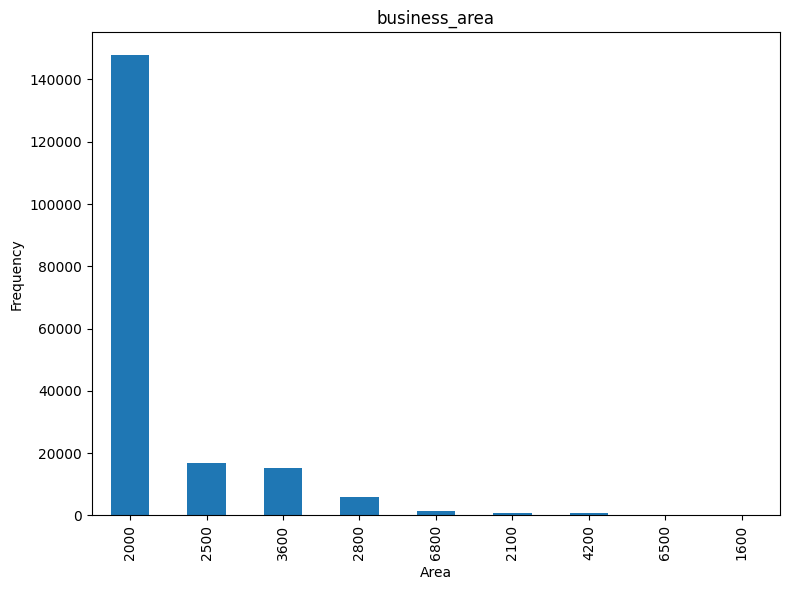

In [23]:
# Bar chart for 'Business Area'
plt.figure(figsize=(8, 6))
ax = data_main['business_area'].value_counts().plot(kind='bar')
plt.title('business_area')
plt.xlabel('Area')
plt.ylabel('Frequency')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

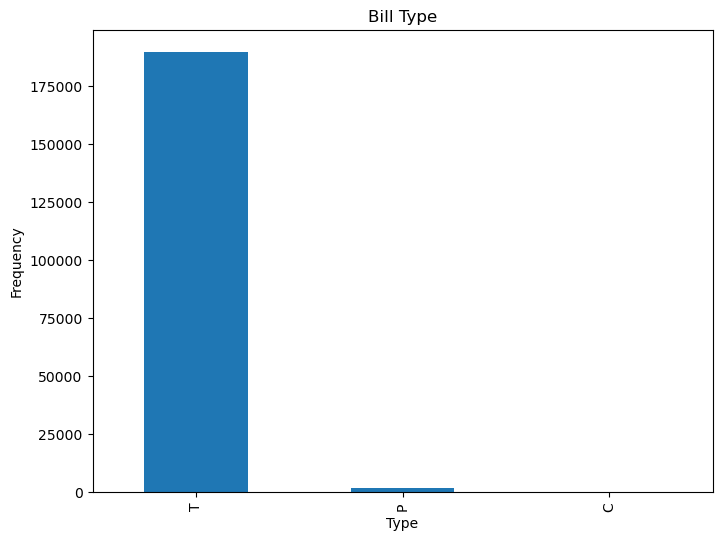

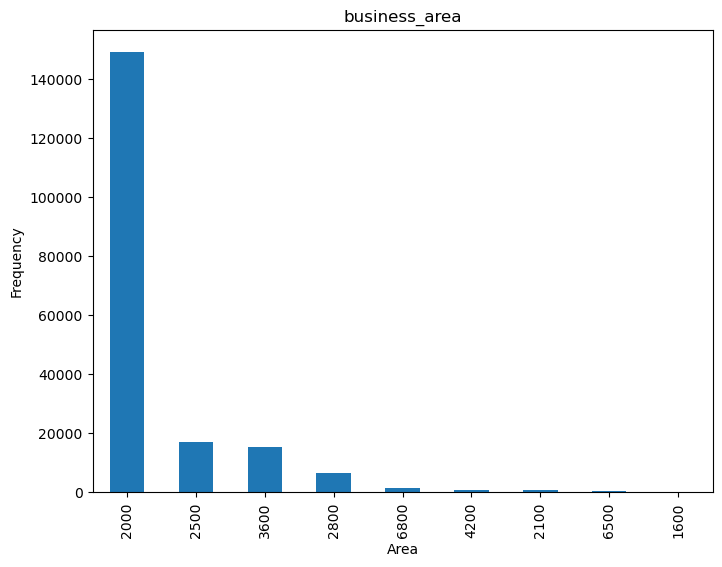

In [ ]:
# Bar chart for 'Bill Type'
plt.figure(figsize=(8, 6))
data_main['bill_type'].value_counts().plot(kind='bar')
plt.title('Bill Type')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.show()

# Bar chart for 'Business Area'
plt.figure(figsize=(8, 6))
data_main['business_area'].value_counts().plot(kind='bar')
plt.title('business_area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

The business area 2000 is the most populous area based on the frequency plot.

And the most common type of Bill type is T.